In [1]:
import pickle
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

fontsize = 22
alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [2]:
df1 = pd.read_csv('results/fABBA0.1sl.csv')
df3 = pd.read_csv('results/fABBA0.3sl.csv')
df5 = pd.read_csv('results/fABBA0.5sl.csv')

In [3]:
df1norm = pd.read_csv('results/count_rate1-norm.csv')
df2norm = pd.read_csv('results/count_rate2-norm.csv')
dflex = pd.read_csv('results/count_ratelexi.csv')

In [4]:
def metric_count(df_sum):
    l2list, DTWlist, timelist, Diglist, num_symbols_list, floplist = list(), list(), list(), list(), list(), list()
    df = df_sum.groupby('alpha').mean()
    l2list, DTWlist, timelist, Diglist, num_symbols_list, floplist = \
        df.fABBA_2, df.fABBA_DTW, df.fABBA_time, df['digitization rate'], df['number of symbols'], df['count']
    return l2list, DTWlist, timelist, Diglist, num_symbols_list, floplist

print('\nlexicographic:')
dflex['digitization rate'] = dflex['number of symbols'] / dflex['number of pieces']
output = dflex.groupby('alpha').mean()
output['fABBA_time'] = output['fABBA_time']*1000
output = output.round(3)
output = output[['digitization rate', 'fABBA_2', 'fABBA_DTW', 'fABBA_time', 'count', 'number of symbols']]
display(output)

print('1norm:')
df1norm['digitization rate'] = df1norm['number of symbols'] / df1norm['number of pieces']
output = df1norm.groupby('alpha').mean()
output['fABBA_time'] = output['fABBA_time']*1000
output = output.round(3)
output = output[['digitization rate', 'fABBA_2', 'fABBA_DTW', 'fABBA_time', 'count', 'number of symbols']]
display(output)

print('\n2norm:')
df2norm['digitization rate'] = df2norm['number of symbols'] / df2norm['number of pieces']
output = df2norm.groupby('alpha').mean()
output['fABBA_time'] = output['fABBA_time']*1000
output = output.round(3)
output = output[['digitization rate', 'fABBA_2', 'fABBA_DTW', 'fABBA_time', 'count', 'number of symbols']]
display(output)


lex_l2, lex_DTW, lex_time, lex_Dig, lex_num_symbols, lex_flops =  metric_count(dflex)
norm1_l2, norm1_DTW, norm1_time, norm1_Dig, norm1_num_symbols, norm1_flops =  metric_count(df1norm)
norm2_l2, norm2_DTW, norm2_time, norm2_Dig, norm2_num_symbols, norm2_flops =  metric_count(df2norm)


lexicographic:


digitization rate  fABBA_2  fABBA_DTW  fABBA_time    count  \
alpha                                                               
0.1                0.896    4.951      1.936       1.387  107.468   
0.2                0.814    6.120      2.246       1.251   93.422   
0.3                0.740    7.584      2.712       1.144   85.810   
0.4                0.671    9.335      3.331       1.047   80.296   
0.5                0.615   11.107      4.063       0.976   70.762   
0.6                0.568   12.945      4.834       0.924   64.819   
0.7                0.528   14.808      5.625       0.881   60.609   
0.8                0.494   16.690      6.455       0.845   56.797   
0.9                0.463   18.547      7.341       0.814   53.241   

       number of symbols  
alpha                     
0.1               19.180  
0.2               16.212  
0.3               13.887  
0.4               11.767  
0.5               10.246  
0.6                9.124  
0.7                8.205  
0.8                7.440  
0.9                6.806

1norm:


digitization rate  fABBA_2  fABBA_DTW  fABBA_time   count  \
alpha                                                              
0.1                0.896    4.945      1.935       1.479  45.485   
0.2                0.815    6.143      2.256       1.336  50.729   
0.3                0.743    7.635      2.743       1.225  51.213   
0.4                0.676    9.374      3.362       1.128  48.072   
0.5                0.620   11.132      4.076       1.054  45.445   
0.6                0.572   13.023      4.884       0.996  43.271   
0.7                0.531   14.945      5.712       0.950  41.048   
0.8                0.495   16.911      6.633       0.911  38.915   
0.9                0.464   18.866      7.607       0.878  37.082   

       number of symbols  
alpha                     
0.1               19.214  
0.2               16.279  
0.3               13.989  
0.4               11.967  
0.5               10.448  
0.6                9.281  
0.7                8.328  
0.8                7.531  
0.9                6.865


2norm:


digitization rate  fABBA_2  fABBA_DTW  fABBA_time   count  \
alpha                                                              
0.1                0.896    4.953      1.933       1.451  53.024   
0.2                0.814    6.168      2.253       1.306  59.606   
0.3                0.740    7.693      2.747       1.192  59.985   
0.4                0.672    9.454      3.362       1.090  54.193   
0.5                0.615   11.289      4.120       1.015  50.184   
0.6                0.568   13.203      4.933       0.960  47.553   
0.7                0.527   15.145      5.769       0.914  44.832   
0.8                0.491   17.106      6.689       0.875  42.152   
0.9                0.460   19.039      7.640       0.843  39.983   

       number of symbols  
alpha                     
0.1               19.182  
0.2               16.204  
0.3               13.864  
0.4               11.749  
0.5               10.226  
0.6                9.089  
0.7                8.154  
0.8                7.373  
0.9                6.722

### l2

In [5]:
plt.style.use('bmh') #plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.rcParams['axes.facecolor'] = 'white'
# plt.plot(Diglist,  label='Digitization rate')
plt.plot(alphas, norm1_l2, label='1-norm', c='r', marker='v', markersize=12, linewidth=1.5)
plt.plot(alphas, norm2_l2, label='2-norm', c='y', marker='o', markersize=12, linewidth=1.5)
plt.plot(alphas, lex_l2, label='Lexicographic', c='c', marker='*', markersize=12, linewidth=1.5)
plt.xlabel('alpha', fontsize=fontsize)
plt.grid(True)
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.tick_params(axis='both',  labelsize=fontsize)
plt.legend(loc='best', prop={'size': fontsize})
plt.savefig('results/analysis/sort_Rate analysis_l2.pdf')
plt.show()

### DTW

In [6]:
plt.style.use('bmh') #plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.rcParams['axes.facecolor'] = 'white'
# plt.plot(Diglist,  label='Digitization rate')
plt.plot(alphas, norm1_DTW, label='1-norm', c='r', marker='v', markersize=12, linewidth=1.5)
plt.plot(alphas, norm2_DTW, label='2-norm', c='y', marker='o', markersize=12, linewidth=1.5)
plt.plot(alphas, lex_DTW, label='Lexicographic', c='c', marker='*', markersize=12, linewidth=1.5)
plt.xlabel('alpha', fontsize=fontsize)
plt.grid(True)
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.tick_params(axis='both',  labelsize=fontsize)
plt.legend(loc='best', prop={'size': fontsize})
plt.savefig('results/analysis/sort_Rate analysis_DTW.pdf')
plt.show()

### Time 

In [7]:
plt.style.use('bmh') #plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.rcParams['axes.facecolor'] = 'white'
# plt.plot(Diglist,  label='Digitization rate')
plt.plot(alphas, norm1_time*10**3, label='1-norm', c='r', marker='v', markersize=12, linewidth=1.5)
plt.plot(alphas, norm2_time*10**3, label='2-norm', c='y', marker='o', markersize=12, linewidth=1.5)
plt.plot(alphas, lex_time*10**3, label='Lexicographic', c='c', marker='*', markersize=12, linewidth=1.5)
plt.xlabel('alpha', fontsize=fontsize)
plt.grid(True)
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.tick_params(axis='both',  labelsize=fontsize)
plt.legend(loc='best', prop={'size': fontsize})
plt.savefig('results/analysis/sort_Rate analysis_time.pdf')
plt.show()

### Number of symbols

In [8]:
plt.style.use('bmh') #plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.rcParams['axes.facecolor'] = 'white'
# plt.plot(Diglist,  label='Digitization rate')
plt.plot(alphas, norm1_num_symbols, label='1-norm', c='r', marker='v', markersize=12, linewidth=1.5)
plt.plot(alphas, norm2_num_symbols, label='2-norm', c='y', marker='o', markersize=12, linewidth=1.5)
plt.plot(alphas, lex_num_symbols, label='lexicographic', c='c', marker='*', markersize=12, linewidth=1.5)
plt.xlabel('alpha', fontsize=fontsize)
plt.grid(True)

plt.tick_params(axis='both',  labelsize=fontsize)
plt.legend(loc='best', prop={'size': fontsize})
plt.savefig('results/analysis/sort_Rate analysis_symbols.pdf')
plt.show()

### Digitization rate

In [9]:
plt.style.use('bmh') #plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.rcParams['axes.facecolor'] = 'white'
# plt.plot(Diglist,  label='Digitization rate')
plt.plot(alphas, norm1_Dig, label='1-norm', c='r', marker='v', markersize=12, linewidth=1.5)
plt.plot(alphas, norm2_Dig, label='2-norm', c='y', marker='o', markersize=12, linewidth=1.5)
plt.plot(alphas, lex_Dig, label='Lexicographic', c='c', marker='*', markersize=12, linewidth=1.5)
plt.xlabel('alpha', fontsize=fontsize)
plt.grid(True)

plt.tick_params(axis='both',  labelsize=fontsize)
plt.legend(loc='best', prop={'size': fontsize})
plt.savefig('results/analysis/sort_Rate analysis_dr.pdf')
plt.show()

### number of distance calculation

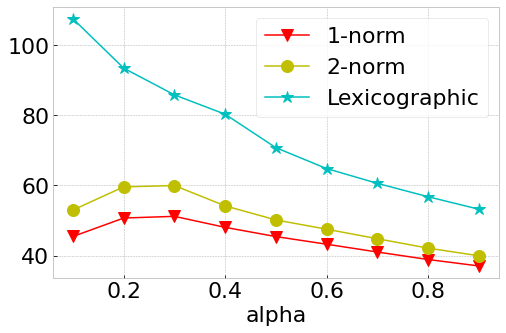

In [10]:
plt.style.use('bmh') #plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.rcParams['axes.facecolor'] = 'white'
# plt.plot(Diglist,  label='Digitization rate')
plt.plot(alphas, norm1_flops, label='1-norm', c='r', marker='v', markersize=12, linewidth=1.5)
plt.plot(alphas, norm2_flops, label='2-norm', c='y', marker='o', markersize=12, linewidth=1.5)
plt.plot(alphas, lex_flops, label='Lexicographic', c='c', marker='*', markersize=12, linewidth=1.5)
plt.xlabel('alpha', fontsize=fontsize)
plt.grid(True)

plt.tick_params(axis='both',  labelsize=fontsize)
plt.legend(loc='best', prop={'size': fontsize})
plt.savefig('results/analysis/sort_Rate analysis_flop.pdf')
plt.show()

### AP DTW

In [11]:
eps = 1e-10

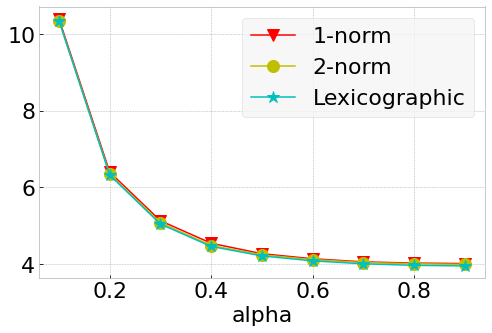

In [12]:
eps = 1e-16
plt.style.use('bmh') #plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.rcParams['axes.facecolor'] = 'white'
# plt.plot(Diglist,  label='Digitization rate')
plt.plot(alphas, np.log(1 + norm1_DTW)/(1-norm1_Dig + eps), label='1-norm', c='r', marker='v', markersize=12, linewidth=1.5)
plt.plot(alphas, np.log(1 + norm2_DTW)/(1-norm2_Dig + eps), label='2-norm', c='y', marker='o', markersize=12, linewidth=1.5)
plt.plot(alphas, np.log(1 + lex_DTW)/(1-lex_Dig + eps), label='Lexicographic', c='c', marker='*', markersize=12, linewidth=1.5)
plt.xlabel('alpha', fontsize=fontsize)
plt.grid(True)
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.tick_params(axis='both',  labelsize=fontsize)
plt.legend(loc='best', prop={'size': fontsize})
plt.savefig('results/analysis/sort_Rate analysis1.pdf')
plt.show()

### AP 2-norm

In [13]:
plt.style.use('bmh') #plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.rcParams['axes.facecolor'] = 'white'
# plt.plot(Diglist,  label='Digitization rate')
plt.plot(alphas, np.log(1+norm1_l2)/(1-norm1_Dig+eps), label='1-norm', c='r', marker='v', markersize=12, linewidth=1.5)
plt.plot(alphas, np.log(1+norm2_l2)/(1-norm2_Dig+eps), label='2-norm', c='y', marker='o', markersize=12, linewidth=1.5)
plt.plot(alphas, np.log(1+lex_l2)/(1-lex_Dig+eps), label='Lexicographic', c='c', marker='*', markersize=12, linewidth=1.5)
plt.xlabel('alpha', fontsize=fontsize)
plt.grid(True)

plt.tick_params(axis='both',  labelsize=fontsize)
plt.legend(loc='best', prop={'size': fontsize})
plt.savefig('results/analysis/sort_Rate analysis2.pdf')
plt.show()

### Compare sorting way of fABBA

In [14]:
df1norm = pd.read_csv('results/count_rate1-norm.csv')
df2norm = pd.read_csv('results/count_rate2-norm.csv')
dflex = pd.read_csv('results/count_ratelexi.csv')

alpha : 0.1


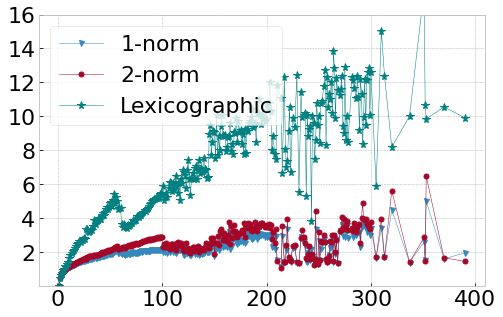

alpha : 0.2


alpha : 0.3


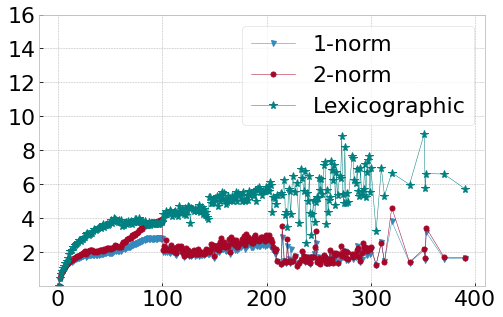

alpha : 0.4


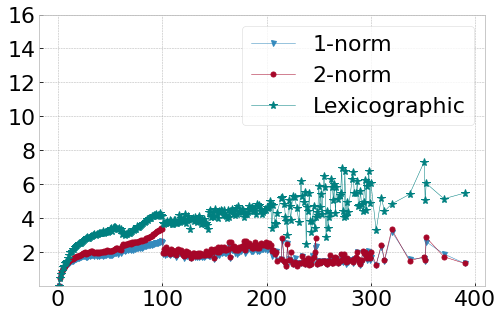

alpha : 0.5


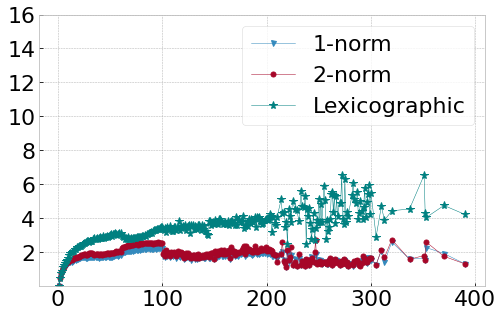

alpha : 0.6


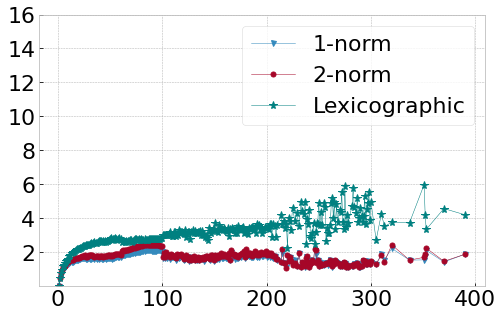

alpha : 0.7


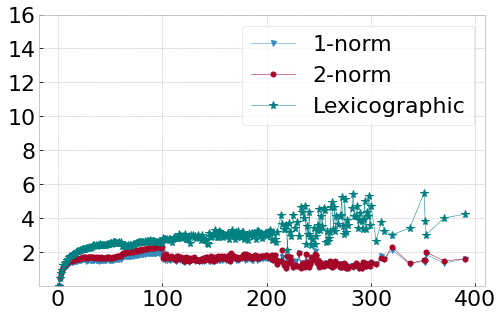

alpha : 0.8


alpha : 0.9


In [15]:
norm1_count = df1norm.groupby(['alpha', 'number of pieces']).mean()
norm2_count = df2norm.groupby(['alpha', 'number of pieces']).mean()
lex_count = dflex.groupby(['alpha', 'number of pieces']).mean()

alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
norm1_count.loc[0.1]
for a in alphas:
    print('alpha : {}'.format(a))
    plt.style.use('bmh') #plt.style.use('ggplot')
    plt.figure(figsize=(8,5))
    plt.rcParams['axes.facecolor'] = 'white'
    plt.plot(norm1_count.loc[a].index, norm1_count.loc[a]['count']/norm1_count.loc[a].index, label='1-norm', marker='v', markersize=5, linewidth=0.5)
    plt.plot(norm2_count.loc[a].index, norm2_count.loc[a]['count']/norm2_count.loc[a].index, label='2-norm', marker='o', markersize=5, linewidth=0.5)
    plt.plot(lex_count.loc[a].index, lex_count.loc[a]['count']/lex_count.loc[a].index, label='Lexicographic', c='teal', marker='*', markersize=8, linewidth=0.5)
    # plt.xlabel('number of pieces', fontsize=fontsize)
    plt.yticks(np.arange(0,15, step=2) + 2)
    plt.ylim(0, 16)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.legend(loc='best', prop={'size': fontsize})
    plt.grid(True)
    plt.savefig('results/analysis/calcs_alpha'+str(a)+'.pdf', bbox_inches='tight')
    plt.show()

### WCSS comparison

In [16]:
WCSS = pd.read_csv('results/WCSS.csv')

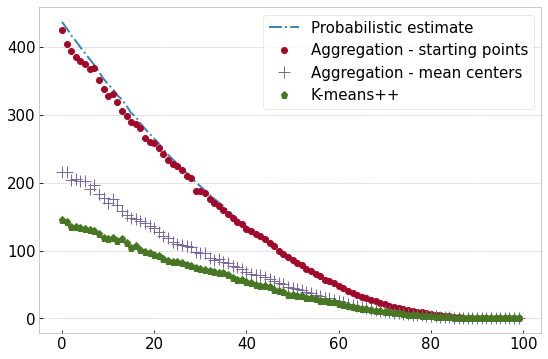

In [17]:
plt.figure(figsize=(9,6))
size = 12
plt.plot(WCSS['Probabilistic estimate'], '-.',  markersize=size, label="Probabilistic estimate")
plt.plot(WCSS['Aggregation - starting points'], '.',  markersize=size, label='Aggregation - starting points')
plt.plot(WCSS['Aggregation - mean centers'], '+', markersize=size, label='Aggregation - mean centers')
plt.plot(WCSS['Kmeans++'], 'p',  markersize=0.6*size, label='K-means++')
plt.legend(fontsize=15)
plt.grid(axis="x")
plt.tick_params(axis='both', labelsize=15)
plt.savefig('results/images/WCSS.pdf', bbox_inches='tight')
plt.show()

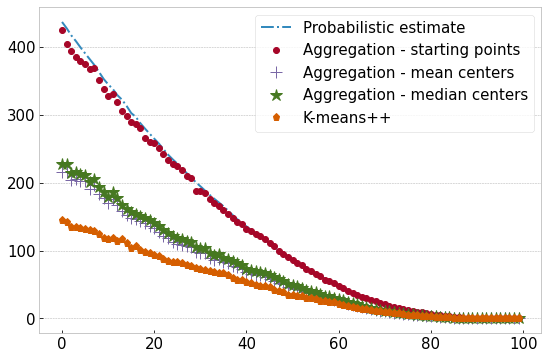

In [18]:
plt.figure(figsize=(9,6))
size = 12
plt.plot(WCSS['Probabilistic estimate'], '-.',  markersize=size, label="Probabilistic estimate")
plt.plot(WCSS['Aggregation - starting points'], '.',  markersize=size, label='Aggregation - starting points')
plt.plot(WCSS['Aggregation - mean centers'], '+', markersize=size, label='Aggregation - mean centers')
plt.plot(WCSS['Aggregation - median centers'], '*', markersize=size, label='Aggregation - median centers')
plt.plot(WCSS['Kmeans++'], 'p',  markersize=0.6*size, label='K-means++')
plt.legend(fontsize=15)
plt.grid(axis="x")
plt.tick_params(axis='both', labelsize=15)
plt.savefig('results/images/WCSS_full.pdf', bbox_inches='tight')
plt.show()

### Compare clustering algorithms in digitization  

In [19]:
clustering_mse = pd.read_csv("results/COM_MSE.csv")
clustering_dtw = pd.read_csv("results/COM_DTW.csv")
clustering_time = pd.read_csv("results/COM_RUNTIME.csv")
clustering_symbols = pd.read_csv("results/COM_SYMBOLS.csv")

### Lineplot

Average MSE of Aggregation: 2.48
Average MSE of K-means++: 1.394
Average MSE of Spectral Clustering: 5.313
Average MSE of Gaussian Mixture: 7.079
Average MSE of DBSCAN: 13.027
Average MSE of HDBSCAN: 11.943


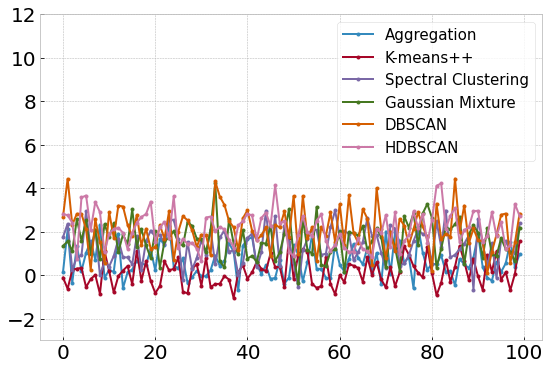

In [20]:
plt.figure(figsize=(9,6))
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams.update({'font.size': 15})
for clustering in clustering_mse:
    print("Average MSE of {}:".format(clustering), np.round(np.mean(clustering_mse[clustering]),3))
    plt.plot(np.log(clustering_mse[clustering]), label=clustering, marker='.')

plt.ylim([-3, 12])
plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('results/images/com_mse.pdf', bbox_inches='tight')
plt.show()

Average DTW of Aggregation: 77.448
Average DTW of K-means++: 54.208
Average DTW of Spectral Clustering: 124.034
Average DTW of Gaussian Mixture: 144.755
Average DTW of DBSCAN: 200.429
Average DTW of HDBSCAN: 196.246


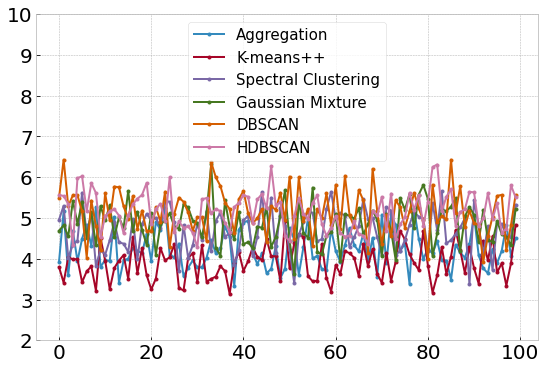

In [21]:
plt.figure(figsize=(9,6))
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams.update({'font.size': 15})
for clustering in clustering_dtw:
    print("Average DTW of {}:".format(clustering), np.round(np.mean(clustering_dtw[clustering]),3))
    plt.plot(np.log(clustering_dtw[clustering]), label=clustering, marker='.')

plt.ylim([2, 10])
plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('results/images/com_dtw.pdf', bbox_inches='tight')
plt.show()

Average number of symbols of Aggregation: 48.55
Average number of symbols of K-means++: 48.55
Average number of symbols of Spectral Clustering: 48.55
Average number of symbols of Gaussian Mixture: 47.66
Average number of symbols of DBSCAN: 49.64
Average number of symbols of HDBSCAN: 50.17


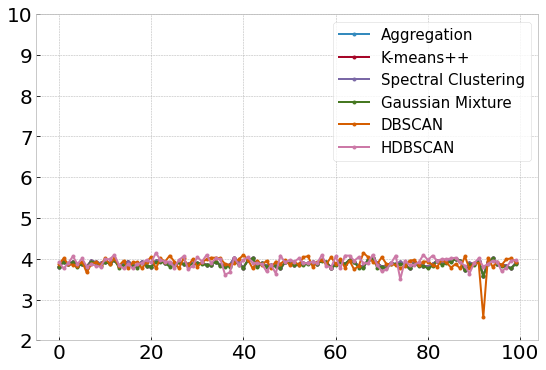

In [22]:
plt.figure(figsize=(9,6))
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams.update({'font.size': 15})
for clustering in clustering_symbols:
    print("Average number of symbols of {}:".format(clustering), np.round(np.mean(clustering_symbols[clustering]),3))
    plt.plot(np.log(clustering_symbols[clustering]), label=clustering, marker='.')

plt.ylim([2, 10])
plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('results/images/com_symbols.pdf', bbox_inches='tight')
plt.show()

Average runtime of Aggregation: 51.215
Average runtime of K-means++: 394.925
Average runtime of Spectral Clustering: 869.471
Average runtime of Gaussian Mixture: 341.255
Average runtime of DBSCAN: 59.057
Average runtime of HDBSCAN: 81.773


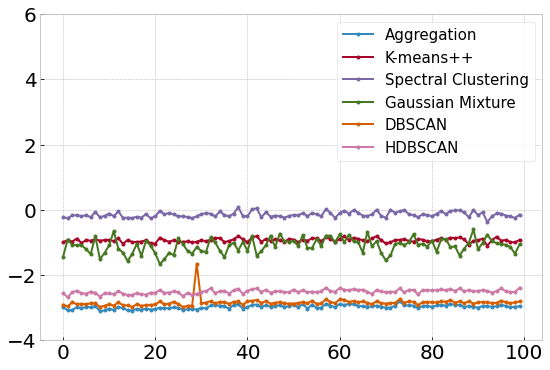

In [23]:
plt.figure(figsize=(9,6))
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams.update({'font.size': 15})
for clustering in clustering_time:
    print("Average runtime of {}:".format(clustering), np.round(np.mean(clustering_time[clustering])*1000,3))
    plt.plot(np.log(clustering_time[clustering]), label=clustering, marker='.')

plt.ylim([-4, 6])
plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('results/images/com_time.pdf', bbox_inches='tight')
plt.show()

### Boxplot

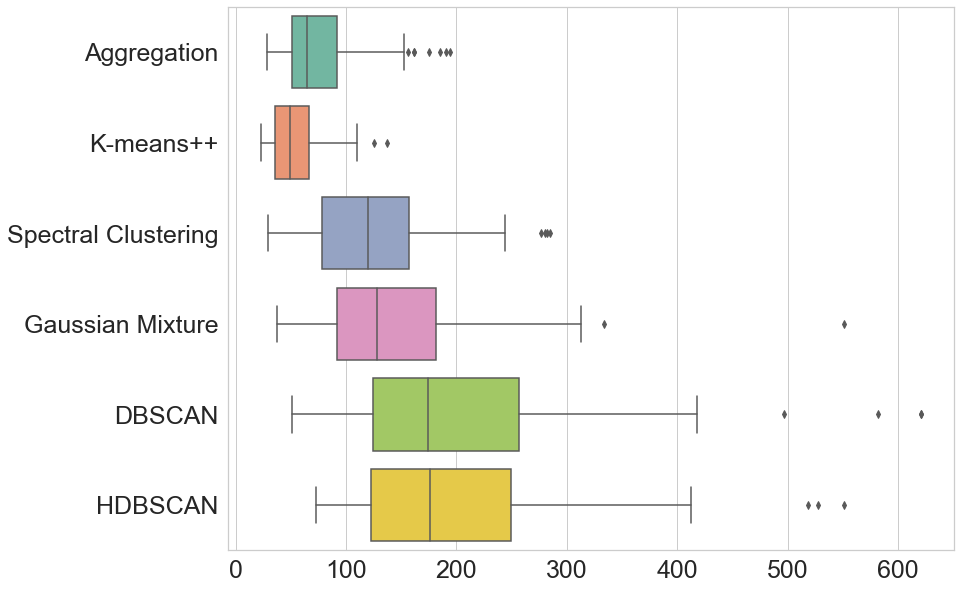

In [24]:
dtw_df = pd.DataFrame(clustering_dtw)
plt.figure(figsize = (13,10))
plt.rcParams.update({'font.size': 15})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=dtw_df, orient="h", palette="Set2")
plt.tick_params(axis='both', which='major', labelsize=25)
plt.savefig('results/images/com_dtw_box.pdf', bbox_inches='tight')
plt.show()

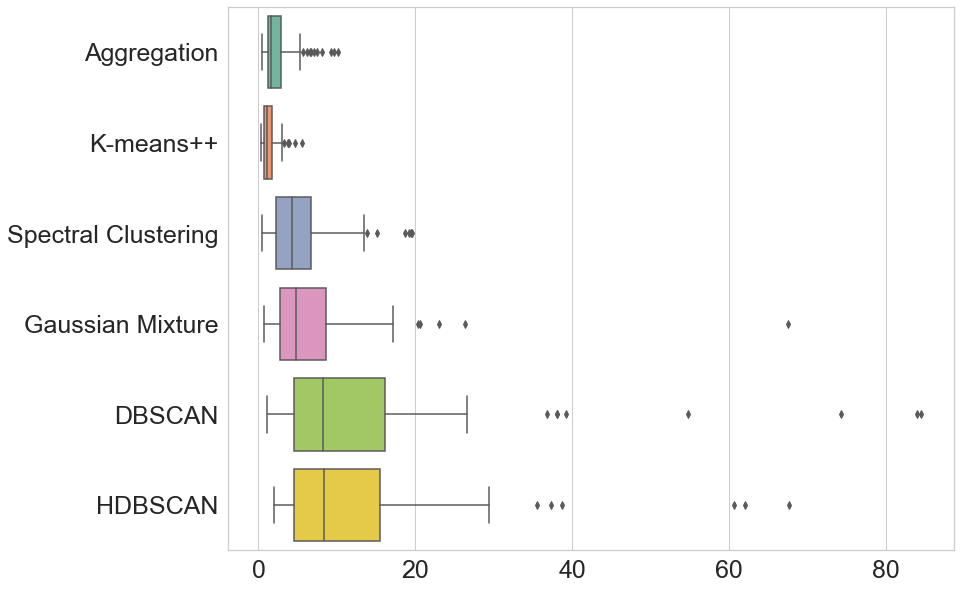

In [25]:
mse_df = pd.DataFrame(clustering_mse)
plt.figure(figsize = (13,10))
plt.rcParams.update({'font.size': 15})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=mse_df, orient="h", palette="Set2")
plt.tick_params(axis='both', which='major', labelsize=25)
plt.savefig('results/images/com_mse_box.pdf', bbox_inches='tight')
plt.show()

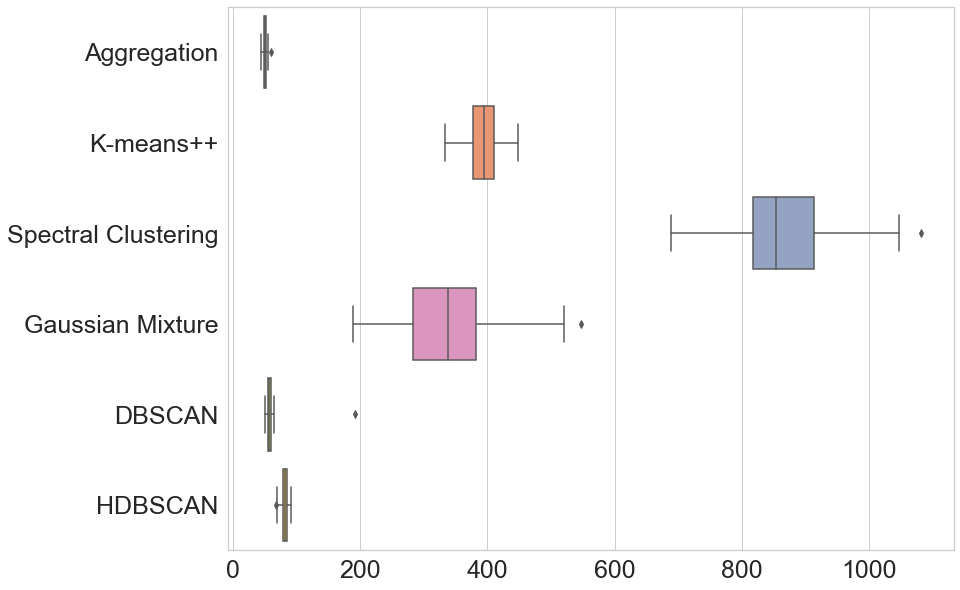

In [26]:
time_df = pd.DataFrame(clustering_time) * 1000
plt.figure(figsize = (13,10))
plt.rcParams.update({'font.size': 15})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=time_df, orient="h", palette="Set2")
plt.tick_params(axis='both', which='major', labelsize=25)
plt.savefig('results/images/com_time_box.pdf', bbox_inches='tight')
plt.show()

In [27]:
symbols_df = pd.DataFrame(clustering_symbols).astype(int)
plt.figure(figsize = (13,10))
plt.rcParams.update({'font.size': 15})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=symbols_df, orient="h", palette="Set2")
plt.tick_params(axis='both', which='major', labelsize=25)
plt.savefig('results/images/com_symbols_box.pdf', bbox_inches='tight')
plt.show()